In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dropout

In [4]:
df = pd.read_csv(r'/kaggle/input/cleaned-data/cleaned_data.csv')

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

target          0
ids             0
date            0
flag            0
user            0
text            0
cleaned_text    0
dtype: int64

In [7]:
X_train, X_test, y_train, y_val = train_test_split(df['cleaned_text'], df['target'] ,test_size=0.2, random_state=42)

In [8]:
max_words = 25000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [9]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [10]:
max_sequence_length = max([len(seq) for seq in X_train_seq])

In [11]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [21]:
def create_model(max_sequence_length, embedding_dim, max_words, lstm_units, num_layers=1):
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
    for _ in range(num_layers - 1):
        model.add(LSTM(lstm_units, return_sequences=True))
    model.add(LSTM(lstm_units, return_sequences=False)) 
    model.add(Dense(5, activation='softmax'))  
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
def train_model(model, X_train_pad, y_train, X_val_pad, y_val, batch_size):
    model.fit(X_train_pad, y_train, batch_size=batch_size, epochs=10, validation_data=(X_val_pad, y_val))

In [13]:
batch_size_1 = 4
embedding_dim_1 = 10
lstm_units_1 = 8

model_1 = create_model(
    max_sequence_length=max_sequence_length,
    embedding_dim=embedding_dim_1,
    max_words=max_words,
    lstm_units=lstm_units_1,
    num_layers=1
)

# Train the model with the corrected batch size
train_model(model_1, X_train_pad, y_train, X_test_pad, y_val, batch_size=batch_size_1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1582s 5ms/step - accuracy: 0.7527 - loss: 0.5010 - val_accuracy: 0.7741 - val_loss: 0.4701
Epoch 2/10
318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1599s 5ms/step - accuracy: 0.7786 - loss: 0.4633 - val_accuracy: 0.7756 - val_loss: 0.4681
Epoch 3/10
318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1587s 5ms/step - accuracy: 0.7812 - loss: 0.4596 - val_accuracy: 0.7755 - val_loss: 0.4672
Epoch 4/10
318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1589s 5ms/step - accuracy: 0.7835 - loss: 0.4566 - val_accuracy: 0.7753 - val_loss: 0.4683
Epoch 5/10
318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1581s 5ms/step - accuracy: 0.7833 - loss: 0.4564 - val_accuracy: 0.7750 - val_loss: 0.4696
Epoch 6/10
183489/318244 ━━━━━━━━━━━━━━━━━━━━ 9:59 4ms/step - accuracy: 0.7851 - loss: 0.4541

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1585s 5ms/step - accuracy: 0.7845 - loss: 0.4551 - val_accuracy: 0.7748 - val_loss: 0.4696
Epoch 7/10
318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1583s 5ms/step - accuracy: 0.7848 - loss: 0.4546 - val_accuracy: 0.7753 - val_loss: 0.4696
Epoch 8/10
318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1581s 5ms/step - accuracy: 0.7849 - loss: 0.4546 - val_accuracy: 0.7751 - val_loss: 0.4693
Epoch 9/10
318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1573s 5ms/step - accuracy: 0.7845 - loss: 0.4545 - val_accuracy: 0.7752 - val_loss: 0.4702
Epoch 10/10
318244/318244 ━━━━━━━━━━━━━━━━━━━━ 1566s 5ms/step - accuracy: 0.7855 - loss: 0.4538 - val_accuracy: 0.7743 - val_loss: 0.4696


In [18]:
y_pred = np.argmax(model_1.predict(X_test_pad), axis=1)
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
print(cm)

9946/9946 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    158747
           4       0.76      0.80      0.78    159497

    accuracy                           0.77    318244
   macro avg       0.77      0.77      0.77    318244
weighted avg       0.77      0.77      0.77    318244

[[119494  39253]
 [ 32561 126936]]


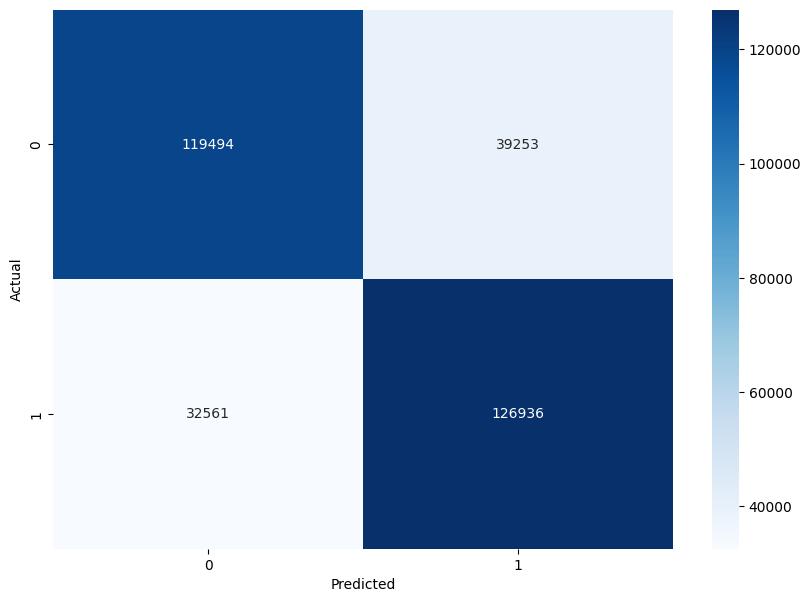

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Second set of parameters
batch_size_2 = 8
embedding_dim_2 = 30
lstm_units_2 = 16

model_2 = create_model(max_sequence_length, embedding_dim_2, max_words, lstm_units_2, num_layers=2)
train_model(model_2, X_train_pad, y_train, X_test_pad, y_val, batch_size_2)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1092s 7ms/step - accuracy: 0.7550 - loss: 0.4961 - val_accuracy: 0.7801 - val_loss: 0.4607
Epoch 2/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1072s 7ms/step - accuracy: 0.7893 - loss: 0.4472 - val_accuracy: 0.7820 - val_loss: 0.4595
Epoch 3/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1078s 7ms/step - accuracy: 0.7973 - loss: 0.4351 - val_accuracy: 0.7817 - val_loss: 0.4610
Epoch 4/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1067s 7ms/step - accuracy: 0.8031 - loss: 0.4258 - val_accuracy: 0.7809 - val_loss: 0.4613
Epoch 5/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1069s 7ms/step - accuracy: 0.8075 - loss: 0.4190 - val_accuracy: 0.7799 - val_loss: 0.4634
Epoch 6/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1447s 9ms/step - accuracy: 0.8110 - loss: 0.4124 - val_accuracy: 0.7779 - val_loss: 0.4649
Epoch 7/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1487s 9ms/step - accuracy: 0.8151 - loss: 0.4069 - val_accuracy: 0.7775 - val_loss: 0.4714
Epoch 8/10
159122/159122 ━━━━━━━━━━━━━━━━

In [14]:
y_pred = np.argmax(model_2.predict(X_test_pad), axis=1)
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
print(cm)

9946/9946 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step
              precision    recall  f1-score   support

           0       0.77      0.78      0.78    158747
           4       0.78      0.78      0.78    159497

    accuracy                           0.78    318244
   macro avg       0.78      0.78      0.78    318244
weighted avg       0.78      0.78      0.78    318244

[[123127  35620]
 [ 35794 123703]]


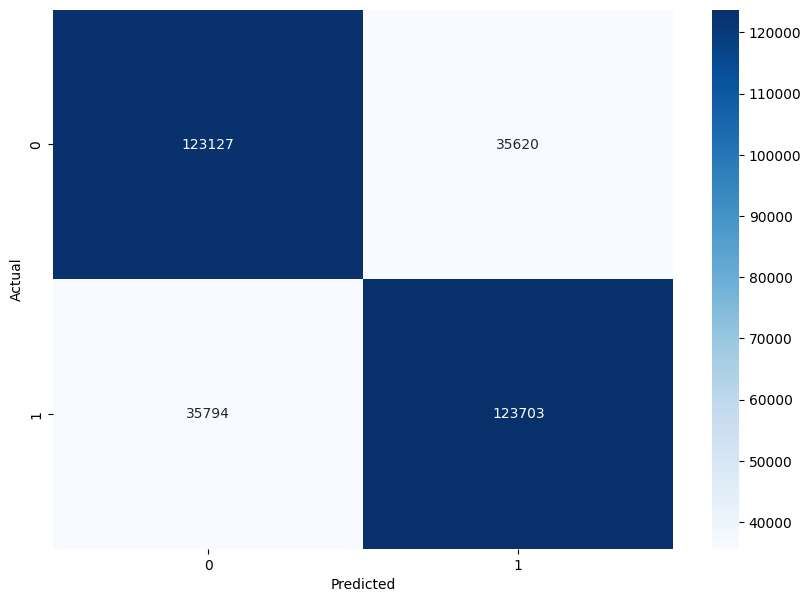

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.ylabel('Actual')
plt.show()

In [19]:
def create_double_lstm_model(max_sequence_length, embedding_dim, max_words, lstm_units, dropout_rate=0.3):
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
    model.add(LSTM(lstm_units, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
embedding_dim_3 = 30
lstm_units_3 = 16
batch_size_3 = 8

double_model_1 = create_double_lstm_model(
    max_sequence_length=max_sequence_length,
    embedding_dim=embedding_dim_3,
    max_words=max_words,
    lstm_units=lstm_units_3,
    dropout_rate=0.3
)

train_model(double_model_1, X_train_pad, y_train, X_test_pad, y_val, batch_size=batch_size_3)

Epoch 1/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1173s 7ms/step - accuracy: 0.7503 - loss: 0.5107 - val_accuracy: 0.7787 - val_loss: 0.4625
Epoch 2/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1166s 7ms/step - accuracy: 0.7854 - loss: 0.4581 - val_accuracy: 0.7811 - val_loss: 0.4590
Epoch 3/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1215s 7ms/step - accuracy: 0.7926 - loss: 0.4479 - val_accuracy: 0.7815 - val_loss: 0.4593
Epoch 4/10
 22519/159122 ━━━━━━━━━━━━━━━━━━━━ 14:52 7ms/step - accuracy: 0.7981 - loss: 0.4381

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 75849/159122 ━━━━━━━━━━━━━━━━━━━━ 9:06 7ms/step - accuracy: 0.7978 - loss: 0.4393

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



128373/159122 ━━━━━━━━━━━━━━━━━━━━ 3:21 7ms/step - accuracy: 0.7971 - loss: 0.4404

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1154s 7ms/step - accuracy: 0.7967 - loss: 0.4411 - val_accuracy: 0.7785 - val_loss: 0.4612
Epoch 5/10
 22216/159122 ━━━━━━━━━━━━━━━━━━━━ 14:58 7ms/step - accuracy: 0.7998 - loss: 0.4348

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 71964/159122 ━━━━━━━━━━━━━━━━━━━━ 9:35 7ms/step - accuracy: 0.8001 - loss: 0.4351

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



122496/159122 ━━━━━━━━━━━━━━━━━━━━ 4:01 7ms/step - accuracy: 0.7996 - loss: 0.4361

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1160s 7ms/step - accuracy: 0.7992 - loss: 0.4369 - val_accuracy: 0.7793 - val_loss: 0.4619
Epoch 6/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1156s 7ms/step - accuracy: 0.8021 - loss: 0.4328 - val_accuracy: 0.7795 - val_loss: 0.4643
Epoch 7/10
143249/159122 ━━━━━━━━━━━━━━━━━━━━ 1:44 7ms/step - accuracy: 0.8049 - loss: 0.4281

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 38322/159122 ━━━━━━━━━━━━━━━━━━━━ 13:10 7ms/step - accuracy: 0.8083 - loss: 0.4231

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1156s 7ms/step - accuracy: 0.8062 - loss: 0.4266 - val_accuracy: 0.7766 - val_loss: 0.4684
Epoch 9/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1168s 7ms/step - accuracy: 0.8075 - loss: 0.4243 - val_accuracy: 0.7767 - val_loss: 0.4687
Epoch 10/10
159122/159122 ━━━━━━━━━━━━━━━━━━━━ 1169s 7ms/step - accuracy: 0.8095 - loss: 0.4210 - val_accuracy: 0.7765 - val_loss: 0.4682


In [18]:
y_pred = np.argmax(double_model_1.predict(X_test_pad), axis=1)
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
print(cm)

9946/9946 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78    158747
           4       0.78      0.78      0.78    159497

    accuracy                           0.78    318244
   macro avg       0.78      0.78      0.78    318244
weighted avg       0.78      0.78      0.78    318244

[[123296  35451]
 [ 35687 123810]]


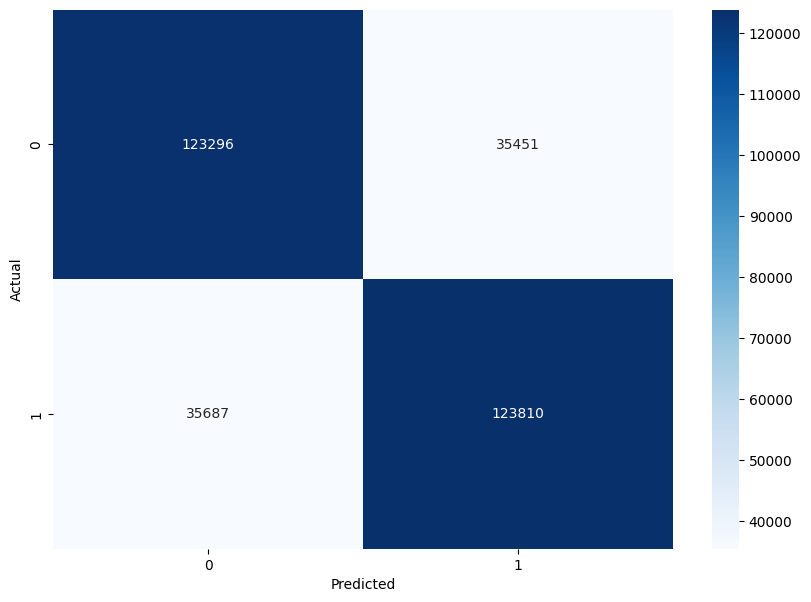

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
embedding_dim_3 = 150 
lstm_units_3 = 128
batch_size_3 = 16

double_model_2 = create_double_lstm_model(
    max_sequence_length=max_sequence_length,
    embedding_dim=embedding_dim_3,
    max_words=max_words,
    lstm_units=lstm_units_3,
    dropout_rate=0.3
)

train_model(double_model_2, X_train_pad, y_train, X_test_pad, y_val, batch_size=batch_size_3)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
79561/79561 ━━━━━━━━━━━━━━━━━━━━ 726s 9ms/step - accuracy: 0.7555 - loss: 0.4973 - val_accuracy: 0.7809 - val_loss: 0.4596
Epoch 2/10
79561/79561 ━━━━━━━━━━━━━━━━━━━━ 722s 9ms/step - accuracy: 0.7906 - loss: 0.4472 - val_accuracy: 0.7835 - val_loss: 0.4553
Epoch 3/10
79561/79561 ━━━━━━━━━━━━━━━━━━━━ 720s 9ms/step - accuracy: 0.7987 - loss: 0.4345 - val_accuracy: 0.7830 - val_loss: 0.4592
Epoch 4/10
20335/79561 ━━━━━━━━━━━━━━━━━━━━ 8:14 8ms/step - accuracy: 0.8137 - loss: 0.4109

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



61465/79561 ━━━━━━━━━━━━━━━━━━━━ 2:31 8ms/step - accuracy: 0.8113 - loss: 0.4143

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



79561/79561 ━━━━━━━━━━━━━━━━━━━━ 724s 9ms/step - accuracy: 0.8133 - loss: 0.4105 - val_accuracy: 0.7812 - val_loss: 0.4633
Epoch 7/10
79561/79561 ━━━━━━━━━━━━━━━━━━━━ 728s 9ms/step - accuracy: 0.8180 - loss: 0.4033 - val_accuracy: 0.7798 - val_loss: 0.4622
Epoch 8/10
79561/79561 ━━━━━━━━━━━━━━━━━━━━ 722s 9ms/step - accuracy: 0.8205 - loss: 0.3990 - val_accuracy: 0.7781 - val_loss: 0.4737
Epoch 9/10
79561/79561 ━━━━━━━━━━━━━━━━━━━━ 721s 9ms/step - accuracy: 0.8225 - loss: 0.3945 - val_accuracy: 0.7782 - val_loss: 0.4690
Epoch 10/10
79561/79561 ━━━━━━━━━━━━━━━━━━━━ 726s 9ms/step - accuracy: 0.8237 - loss: 0.3934 - val_accuracy: 0.7772 - val_loss: 0.4722


In [23]:
y_pred = np.argmax(double_model_2.predict(X_test_pad), axis=1)
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
print(cm)

9946/9946 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.79      0.78    158747
           4       0.78      0.77      0.78    159497

    accuracy                           0.78    318244
   macro avg       0.78      0.78      0.78    318244
weighted avg       0.78      0.78      0.78    318244

[[124984  33763]
 [ 37143 122354]]


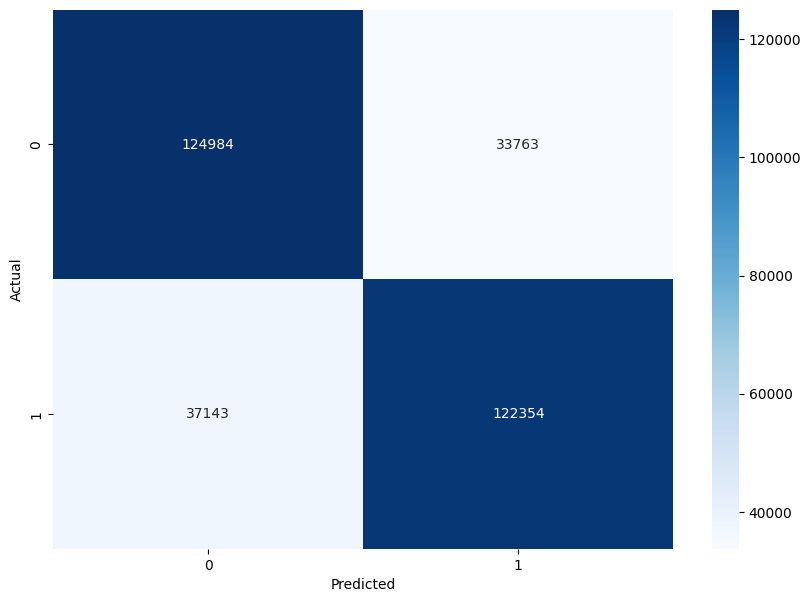

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
embedding_dim_3 = 300 
lstm_units_3 = 256
batch_size_3 = 32

double_model_2 = create_double_lstm_model(
    max_sequence_length=max_sequence_length,
    embedding_dim=embedding_dim_3,
    max_words=max_words,
    lstm_units=lstm_units_3,
    dropout_rate=0.2
)

train_model(double_model_2, X_train_pad, y_train, X_test_pad, y_val, batch_size=batch_size_3)

Epoch 1/10
39781/39781 ━━━━━━━━━━━━━━━━━━━━ 474s 12ms/step - accuracy: 0.7558 - loss: 0.4965 - val_accuracy: 0.7815 - val_loss: 0.4582
Epoch 2/10
39781/39781 ━━━━━━━━━━━━━━━━━━━━ 473s 12ms/step - accuracy: 0.7923 - loss: 0.4424 - val_accuracy: 0.7837 - val_loss: 0.4554
Epoch 3/10
39781/39781 ━━━━━━━━━━━━━━━━━━━━ 477s 12ms/step - accuracy: 0.8033 - loss: 0.4242 - val_accuracy: 0.7838 - val_loss: 0.4585
Epoch 4/10
39781/39781 ━━━━━━━━━━━━━━━━━━━━ 476s 12ms/step - accuracy: 0.8113 - loss: 0.4111 - val_accuracy: 0.7823 - val_loss: 0.4589
Epoch 5/10
39781/39781 ━━━━━━━━━━━━━━━━━━━━ 476s 12ms/step - accuracy: 0.8186 - loss: 0.3982 - val_accuracy: 0.7809 - val_loss: 0.4667
Epoch 6/10
39781/39781 ━━━━━━━━━━━━━━━━━━━━ 476s 12ms/step - accuracy: 0.8256 - loss: 0.3863 - val_accuracy: 0.7786 - val_loss: 0.4741
Epoch 7/10
39781/39781 ━━━━━━━━━━━━━━━━━━━━ 476s 12ms/step - accuracy: 0.8312 - loss: 0.3757 - val_accuracy: 0.7771 - val_loss: 0.4775
Epoch 8/10
39781/39781 ━━━━━━━━━━━━━━━━━━━━ 474s 12ms/s

In [24]:
y_pred = np.argmax(double_model_2.predict(X_test_pad), axis=1)
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)
print(cm)

9946/9946 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    158747
           4       0.77      0.78      0.78    159497

    accuracy                           0.77    318244
   macro avg       0.77      0.77      0.77    318244
weighted avg       0.77      0.77      0.77    318244

[[121405  37342]
 [ 34343 125154]]


# ML Model vs DL Model

#### From all the Deep Learning models trained, we will be selecting the best model and compare the Deep Learning with Model with each Machine Learning Models trained in previous assignment. The comparison will be done on basis of Classification Report, Confusion Matrix and Heatmap.

The Best Deep Learning Model is as follows:  

- ## Classification Report of Best Model

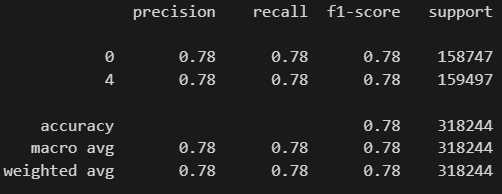  

- ## Heatmap of Best Model

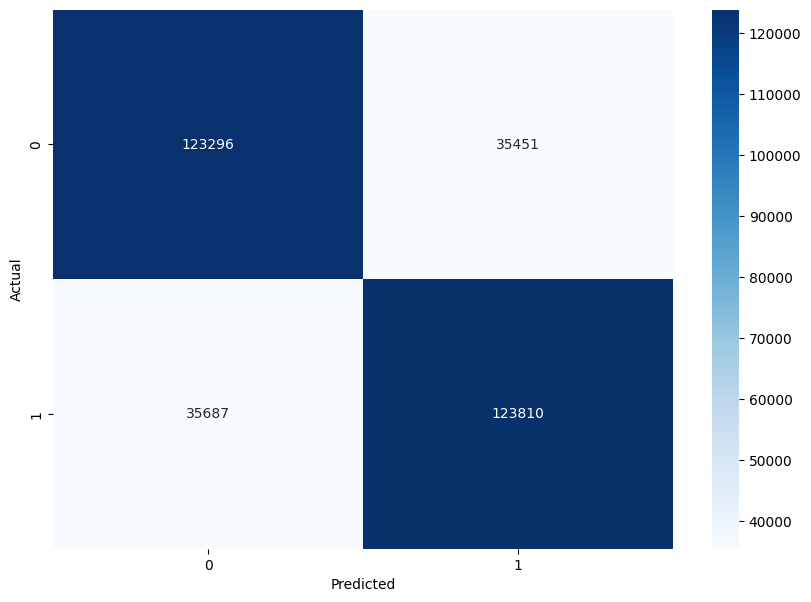

The model was trained on 2 layer LSTM Model with embedding and dropout layers for multi-class classification, using a softmax activation and compiled with sparse categorical cross-entropy loss and the Adam optimizer.

The hyperparameters of Best Model:  
- Embedding Dimension: 30
- LSTM Units: 16
- Batch Size: 8
- Dropout Tate: 0.3

### Comparison with Logistic Regression

- Logistic Regression Classification Report

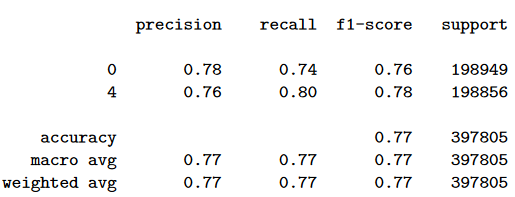

- Logistic Regression Heatmap

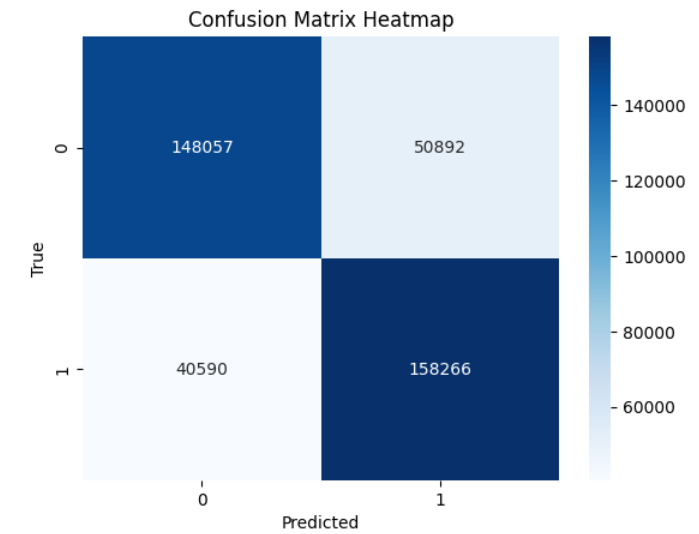

- Comparison  
The Deep Learning Model, with 78% accuracy, outperforms the Logistic Regression Model, which has 77% accuracy. While both models achieve the same F1-score of 0.78 for Class 4, the Deep Learning Model has a higher F1-score for Class 0 (0.78 vs. 0.76), indicating better precision-recall balance. Additionally, the macro and weighted averages are slightly higher in the Deep Learning Model, suggesting better overall generalization. These differences make the Deep Learning Model the better choice for performance.

### Comparison with Random Forest

- Random Forest Classification Report

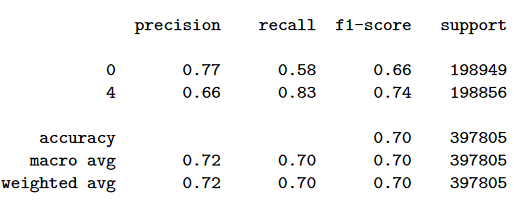

- Random Forest Heatmap

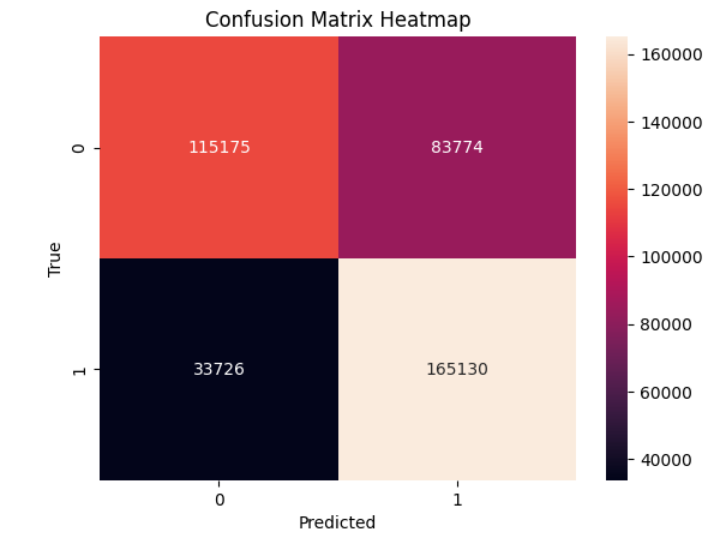

- Comparison  
The deep learning model with 78% accuracy, clearly outperforms the Random Forest Model with 70% accuracy. The deep learning model exhibits balanced precision, recall, and F1-scores of 0.78 across both classes, whereas the Random Forest Model suffers from lower precision (0.77 vs. 0.66) and recall (0.58 vs. 0.83) for Class 0 and Class 4. The deep learning model's higher macro and weighted averages (0.78) further highlight its superior generalization and consistent performance compared to the 0.70 averages of the Random Forest Model.

### Comparison with SVC

- SVC Classification Report

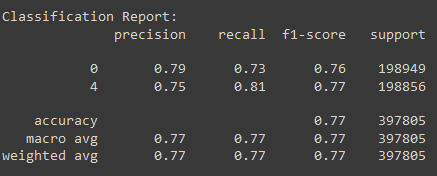
- SVC Heatmap

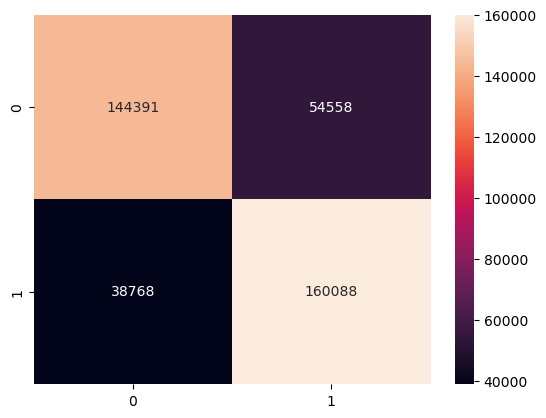 

- Comparison  
Comparing the deep learning model (78% accuracy) with the SVC Model (77% accuracy), the deep learning model demonstrates slightly better performance overall. While the SVC Model achieves a precision of 0.79 and an F1-score of 0.76 for Class 0, and a precision of 0.75 and an F1-score of 0.77 for Class 4, the deep learning model consistently maintains precision, recall, and F1-scores of 0.78 for both classes. Additionally, the deep learning model's higher overall accuracy (78%) surpasses the SVC Model's accuracy of 77%. Both models have identical macro and weighted averages of 0.77; however, the deep learning model's superior accuracy and consistent performance metrics make it the more reliable choice for classification tasks.